## 데이터를 메모리에 로드(Keras 사용)

In [13]:
from tensorflow.keras.datasets import mnist

In [14]:
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

## MNIST 데이터 살펴보기

In [15]:
x_train.shape

(60000, 28, 28)

In [20]:
x_valid.shape

(10000, 28, 28)

In [21]:
x_train.dtype

dtype('uint8')

In [22]:
x_train.min()

0

In [23]:
x_train.max()

255

In [25]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [30]:
# 출력 옵션에서 한 라인의 너비를 무한대(np.inf)로 설정
# 어레이를 한 줄에 출력

import numpy as np
np.set_printoptions(linewidth=np.inf) 

print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

In [24]:
y_train[0]

5

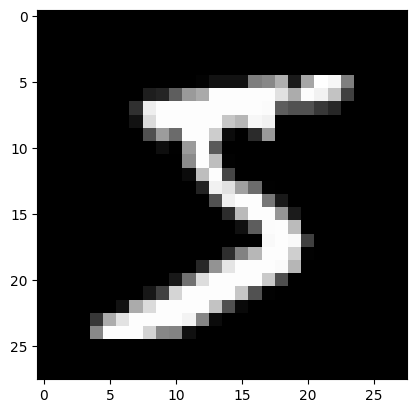

In [34]:
# Matplotlib를 사용하면 데이터세트에서 회색조 이미지를 렌더링 가능

import matplotlib.pyplot as plt

image = x_train[0]
plt.imshow(image, cmap='gray')


## 트레이닝을 위한 데이터 준비

딥러닝에서는 대부분의 경우 트레이닝을 위한 적합한 상태로 데이터를 변환해야 합니다. 
트레이닝을 준비하는 과정에서 데이터에 3가지 작업을 수행해야 합니다.

1. 이미지 데이터를 평탄화하여 모델에 입력되는 이미지를 간소화해야 합니다.
2. 이미지 데이터를 정규화하여 이미지 입력 값이 모델에서 더 쉽게 작동되도록 해야 합니다.
3. 레이블을 분류하여 레이블 값이 모델에서 더 쉽게 작동되도록 해야 합니다.

### 이미지 데이터 평탄화

In [35]:
print(x_train.shape)
x_train = x_train.reshape(60000, 784)
print(x_train.shape)

(60000, 28, 28)
(60000, 784)


In [37]:
print(x_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0   0   0

In [36]:
print(x_valid.shape)
x_valid = x_valid.reshape(10000, 784)
print(x_valid.shape)

(10000, 28, 28)
(10000, 784)


### 이미지 데이터 정규화

In [39]:
x_train = x_train / 255
x_valid = x_valid / 255 

In [40]:
print(x_train.dtype)

float64


In [41]:
print(x_train.min())


0.0


In [42]:
print(x_train.max())


1.0


### 범주 인코딩

Keras는 원핫인코딩 유틸리티를 제공합니다. 
유틸리티를 이용해서 트레이닝 및 검증 레이블 모두 원핫인코딩을 수행합니다.

In [43]:
import tensorflow.keras as keras
num_categories = 10

y_train = keras.utils.to_categorical(y_train, num_categories)
y_valid = keras.utils.to_categorical(y_valid, num_categories)

In [44]:
y_train[0:9]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

## 모델 생성

트레이닝을 위한 데이터가 준비되었으니 이제 데이터로 트레이닝할 모델을 생성해야 합니다. 
이 첫 번째 기본 모델은 여러 개의 *레이어*로 이루어지며 3가지 주요 부분으로 구성됩니다.

1. 입력 레이어
2. 여러 개의 숨겨진 레이어
3. 출력 레이어

In [46]:
# 순차 모델 클래스 호출
from tensorflow.keras.models import Sequential

model = Sequential()

### 입력 레이어 생성

In [47]:
from tensorflow.keras.layers import Dense

units 인수는 레이어 내 뉴런 수
올바른 뉴런 수를 선택하는 것은 데이터세트의 통계적 복잡성을 없애주는 일
"데이터 사이언스" 작업의 핵심

활성화 함수에 대해서는 나중에 자세히 알아보겠지만 일단은 relu 활성화 함수

input_shape 값은 수신되는 데이터의 모양을 지정하며, 여기서는 784개 값으로 이루어진 1D 어레이입니다.

In [48]:
model.add(Dense(units = 512, activation='relu', input_shape=(784,)))

### 숨겨진 레이어 생성

추가 레이어

In [49]:
model.add(Dense(units = 512, activation='relu'))

### 출력 레이어 생성

출력 레이어를 추가

각 레이어의 값이 0에서 1사이의 확률이 되도록

레이어의 모든 출력이 1에 추가되도록 하는 활성 함수인 softmax를 사용

네트워크가 1에서 10까지 출력은 10개의 확률

In [50]:
model.add(Dense(units = 10, activation='softmax'))

### 모델 요약

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


### 모델 컴파일

실제로 데이터를 사용하여 모델을 트레이닝하기 전에 수행해야 할 마지막 단계는 모델을 컴파일하는 것

트레이닝 중 모델에서 성능을 파악하는 데 사용되는 손실 함수를 지정

모델 트레이닝 동안 accuracy도 추적하도록 지정

In [52]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

## 모델 트레이닝

트레이닝 및 검증 데이터와 모델이 준비되었으니 이제 트레이닝 데이터로 모델을 트레이닝하고 검증 데이터로 이를 검증해야 합니다.

\"데이터로 모델을 트레이닝\"하는 것을 흔히 \"모델을 데이터에 맞춘다\"라고도 합니다. 모델을 데이터에 맞춘다는 말은 주어지고 있는 데이터를 좀 더 정확하게 이해하기 위해 모델이 점차적으로 모양을 바꾼다는 점을 부각시킵니다.

Keras로 모델을 맞추는(트레이닝하는) 경우에는 모델의 [fit](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) 메서드를 사용합니다. 그러면 다음 인수를 예상합니다.

* 트레이닝 데이터
* 트레이닝 데이터의 레이블
* 전체 트레이닝 데이터세트에 대해 트레이닝해야 하는 횟수(*에포크*)
* 검증 또는 테스트 데이터 및 해당 레이블



* 트레이닝 데이터
* 트레이닝 데이터의 레이블
* 전체 트레이닝 데이터세트에 대해 트레이닝해야 하는 횟수(*에포크*)
* 검증 또는 테스트 데이터 및 해당 레이블

아래 셀을 실행하여 모델을 트레이닝하십시오. 출력에 대해서는 트레이닝이 완료된 후에 논의하겠습니다.

In [53]:
history = model.fit(
    x_train, y_train, epochs=5, verbose=1, validation_data=(x_valid, y_valid)
)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1879 - accuracy: 0.9433 - val_loss: 0.0961 - val_accuracy: 0.9701
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0860 - accuracy: 0.9753 - val_loss: 0.0941 - val_accuracy: 0.9727
Epoch 3/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0628 - accuracy: 0.9825 - val_loss: 0.0989 - val_accuracy: 0.9761
Epoch 4/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0478 - accuracy: 0.9868 - val_loss: 0.0829 - val_accuracy: 0.9779
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0390 - accuracy: 0.9896 - val_loss: 0.0867 - val_accuracy: 0.9803


### 정확도 관찰

5회의 에포크 각각에 대해 `accuracy` 및 `val_accuracy` 점수를 살펴보십시오. `accuracy`는 모든 트레이닝 데이터에 대한 에포크 동안의 모델 성능이 어땠는지를 명시합니다. `val_accuracy`는 모델을 트레이닝하는 데 전혀 사용되지 않는 검증 데이터에 대한 모델 성능이 어땠는지를 나타냅니다.

모델이 꽤 뛰어난 성능을 보여줬습니다! 정확도는 거의 100%에 빠르게 도달했고, 이는 검증 정확도의 경우에도 비슷했습니다. 이제 수기 이미지를 정확하게 검출하고 분류하는 데 사용할 수 있는 모델이 준비되었습니다.

다음 단계는 이 모델을 사용하여 처음 접하는 새로운 수기 이미지를 분류하는 것입니다. 이를 [추론](https://blogs.nvidia.com/blog/2016/08/22/difference-deep-learning-training-inference-ai/)이라고 부릅니다. 추론 과정은 이후 연습에서 살펴보겠습니다. 

## ☆ 추가 연습 ☆

시간적 여유가 있으십니까? 다음 섹션에서는 위의 수치 중 일부에 어떻게 도달했는지에 대해 이야기하겠지만, 오늘날 자주 사용되는 기술을 개발하는 연구원이 된 느낌이 어떤 것인지를 상상해볼 수 있습니다.

궁극적으로 각 뉴런은 행을 어떤 데이터에 맞추려고 시도합니다. 아래에는 몇몇 데이터포인트, 그리고 등식 [y = mx + b](https://www.mathsisfun.com/equation_of_line.html)을 사용하여 임의로 도출된 행이 있습니다.

`m` 및 `b`를 변경하여 최대한 낮은 손실을 찾아보십시오. 가장 적합한 행을 어떻게 찾았습니까? 프로그램이 여러분의 전략을 따르도록 만들 수 있습니까?

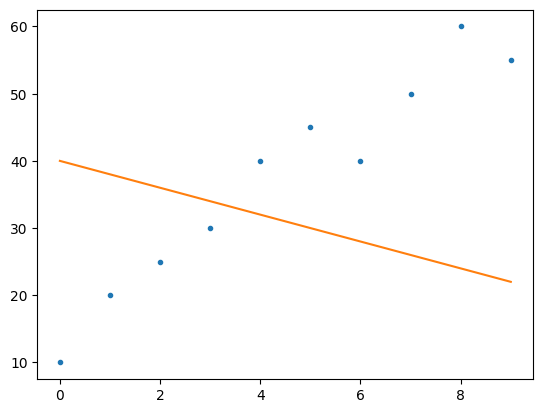

Loss: 475.5


In [56]:
import numpy as np
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt

m = -2  # -2 to start, change me please
b = 40  # 40 to start, change me please

# Sample data
x = np.array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9])
y = np.array([10, 20, 25, 30, 40, 45, 40, 50, 60, 55])
y_hat = x * m + b

plt.plot(x, y, '.')
plt.plot(x, y_hat, '-')
plt.show()


print("Loss:", np.sum((y - y_hat)**2)/len(x))